# Assignment 10: Association Rules (Market Basket Analysis)

## Dataset: Mushroom Dataset

**Topics Covered:**
- Apriori Algorithm
- Support, Confidence, Lift
- Association Rule Mining

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load mushroom data
df = pd.read_csv('datasets/mushroom.csv')
print("Dataset loaded! Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset loaded! Shape: (8124, 13)

Columns: ['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_height', 'cap_diameter']


,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_height,cap_diameter
0,e,f,f,y,f,p,n,c,b,b,e,6.55,12.70
1,p,x,f,c,t,a,f,d,b,b,t,12.39,13.48
2,p,b,f,g,t,m,d,c,b,p,t,10.59,7.40
3,e,x,f,g,t,n,f,d,b,o,e,4.83,10.45
4,p,f,y,w,f,c,d,w,n,n,e,15.16,9.05


In [12]:
# Data Preprocessing
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check unique values in each column
print("\nUnique values per column:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Missing values per column:
class              0
cap_shape          0
cap_surface        0
cap_color          0
bruises            0
odor               0
gill_attachment    0
gill_spacing       0
gill_size          0
gill_color         0
stalk_shape        0
stalk_height       0
cap_diameter       0
dtype: int64

Unique values per column:
class: 2 unique values
cap_shape: 6 unique values
cap_surface: 4 unique values
cap_color: 10 unique values
bruises: 2 unique values
odor: 9 unique values
gill_attachment: 4 unique values
gill_spacing: 3 unique values
gill_size: 2 unique values
gill_color: 12 unique values
stalk_shape: 2 unique values
stalk_height: 1788 unique values
cap_diameter: 1398 unique values


In [13]:
# One-hot encode all categorical columns for association rule mining
# Create attribute-value pairs as items
df_encoded = pd.get_dummies(df, prefix_sep='=')

# Convert to boolean type for better performance
df_encoded = df_encoded.astype(bool)

print("Encoded dataset shape:", df_encoded.shape)
print("\nSample columns:", df_encoded.columns[:10].tolist())
df_encoded.head()

Encoded dataset shape: (8124, 58)

Sample columns: ['stalk_height', 'cap_diameter', 'class=e', 'class=p', 'cap_shape=b', 'cap_shape=c', 'cap_shape=f', 'cap_shape=k', 'cap_shape=s', 'cap_shape=x']


,stalk_height,cap_diameter,class=e,class=p,cap_shape=b,cap_shape=c,cap_shape=f,cap_shape=k,cap_shape=s,cap_shape=x,...,gill_color=k,gill_color=n,gill_color=o,gill_color=p,gill_color=r,gill_color=u,gill_color=w,gill_color=y,stalk_shape=e,stalk_shape=t
0,True,True,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,True,True,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,True,True,False,True,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,True,True,True,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,True,True,False,True,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [14]:
# Apply Apriori algorithm
print("=== Apriori Algorithm ===")

# Find frequent itemsets with minimum support of 30%
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)
print("Number of frequent itemsets:", len(frequent_itemsets))

# Sort by support
frequent_itemsets = frequent_itemsets.sort_values('support', ascending=False)
print("\nTop 15 frequent itemsets:")
frequent_itemsets.head(15)

=== Apriori Algorithm ===
Number of frequent itemsets: 47

Top 15 frequent itemsets:


,support,itemsets
0,1.000000,(stalk_height)
1,1.000000,(cap_diameter)
13,1.000000,"(stalk_height, cap_diameter)"
4,0.507755,(bruises=f)
38,0.507755,"(stalk_height, cap_diameter, bruises=f)"
27,0.507755,"(cap_diameter, bruises=f)"
16,0.507755,"(stalk_height, bruises=f)"
26,0.505047,"(class=p, cap_diameter)"
3,0.505047,(class=p)
15,0.505047,"(class=p, stalk_height)"


In [15]:
# Generate association rules
print("=== Association Rules ===")

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
rules = rules.sort_values('lift', ascending=False)

print("Number of rules:", len(rules))
print("\nTop 15 rules by lift:")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(15)

=== Association Rules ===
Number of rules: 57

Top 15 rules by lift:


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,(stalk_height),(cap_diameter),1.000000,1.0,1.0
1,(cap_diameter),(stalk_height),1.000000,1.0,1.0
2,"(stalk_height, bruises=f)",(cap_diameter),0.507755,1.0,1.0
3,"(cap_diameter, bruises=f)",(stalk_height),0.507755,1.0,1.0
4,(bruises=f),"(stalk_height, cap_diameter)",0.507755,1.0,1.0
5,(bruises=f),(cap_diameter),0.507755,1.0,1.0
6,(bruises=f),(stalk_height),0.507755,1.0,1.0
7,(class=p),(cap_diameter),0.505047,1.0,1.0
8,(class=p),(stalk_height),0.505047,1.0,1.0
9,"(class=p, stalk_height)",(cap_diameter),0.505047,1.0,1.0


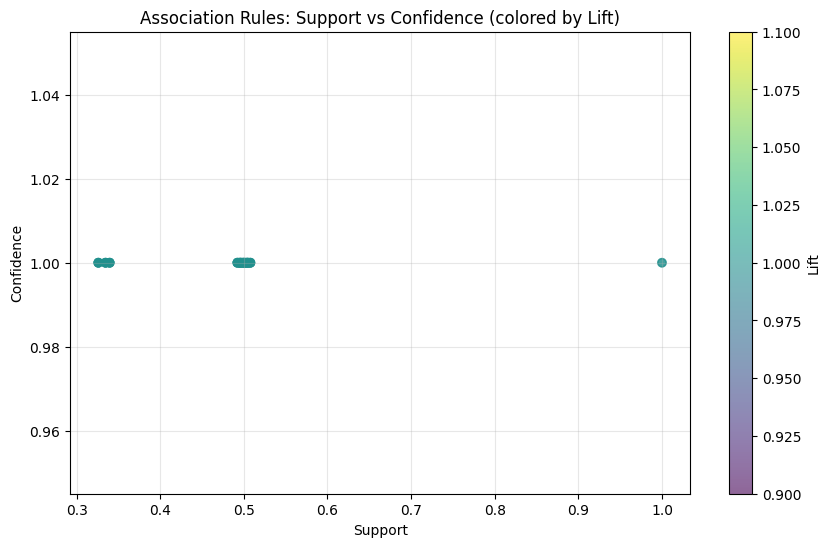

In [16]:
# Visualize rules
if len(rules) > 0:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', alpha=0.6)
    plt.colorbar(scatter, label='Lift')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.title('Association Rules: Support vs Confidence (colored by Lift)')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("No rules to visualize")

In [17]:
# Filter strong rules
strong_rules = rules[(rules['lift'] >= 1.5) & (rules['confidence'] >= 0.8)]
print("=== Strong Rules (Lift>=1.5, Confidence>=0.8) ===")
print("Number of strong rules:", len(strong_rules))
print("\nTop 10 strong rules:")
strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

=== Strong Rules (Lift>=1.5, Confidence>=0.8) ===
Number of strong rules: 0

Top 10 strong rules:


,antecedents,consequents,support,confidence,lift


## Tuning Thresholds

Let's experiment with different support and confidence thresholds to find meaningful rules.

Support: 0.2, Frequent Itemsets: 175, Rules: 217
Support: 0.3, Frequent Itemsets: 47, Rules: 57
Support: 0.4, Frequent Itemsets: 35, Rules: 42
Support: 0.5, Frequent Itemsets: 19, Rules: 22
Support: 0.6, Frequent Itemsets: 3, Rules: 2


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)
c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metr

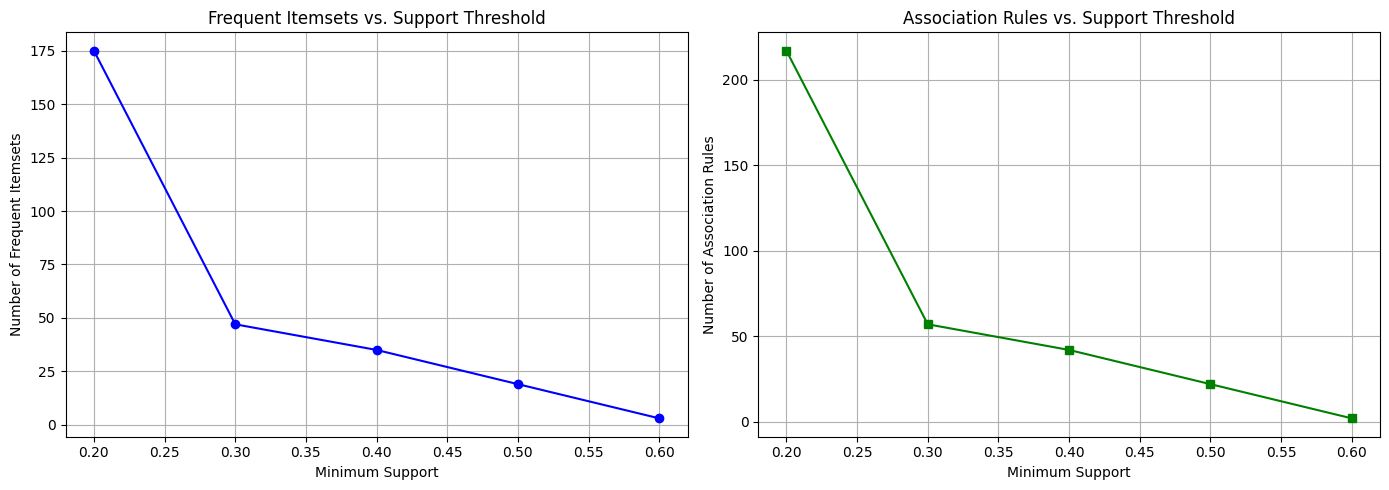

In [18]:
# Experiment with different support thresholds
support_values = [0.2, 0.3, 0.4, 0.5, 0.6]
num_itemsets = []
num_rules = []

for support in support_values:
    frequent_itemsets_tuned = apriori(df_encoded, min_support=support, use_colnames=True)
    num_itemsets.append(len(frequent_itemsets_tuned))
    
    if len(frequent_itemsets_tuned) > 0:
        rules_tuned = association_rules(frequent_itemsets_tuned, metric='confidence', min_threshold=0.7)
        num_rules.append(len(rules_tuned))
    else:
        num_rules.append(0)
    
    print(f"Support: {support}, Frequent Itemsets: {len(frequent_itemsets_tuned)}, Rules: {num_rules[-1]}")

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(support_values, num_itemsets, marker='o', color='blue')
axes[0].set_xlabel('Minimum Support')
axes[0].set_ylabel('Number of Frequent Itemsets')
axes[0].set_title('Frequent Itemsets vs. Support Threshold')
axes[0].grid(True)

axes[1].plot(support_values, num_rules, marker='s', color='green')
axes[1].set_xlabel('Minimum Support')
axes[1].set_ylabel('Number of Association Rules')
axes[1].set_title('Association Rules vs. Support Threshold')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [19]:
# Generate final rules with optimized thresholds
print("=== Final Association Rules with Optimized Thresholds ===")

# Using support=0.3 and confidence=0.8 for meaningful rules
frequent_itemsets_final = apriori(df_encoded, min_support=0.3, use_colnames=True)
print(f"Number of frequent itemsets: {len(frequent_itemsets_final)}")

rules_final = association_rules(frequent_itemsets_final, metric='confidence', min_threshold=0.8)
rules_final = rules_final.sort_values('lift', ascending=False)

print(f"Number of rules with confidence >= 0.8: {len(rules_final)}")
print("\nTop 20 rules by lift:")
rules_final[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

=== Final Association Rules with Optimized Thresholds ===
Number of frequent itemsets: 47
Number of rules with confidence >= 0.8: 57

Top 20 rules by lift:


c:\Users\vicky\OneDrive\Desktop\Data-science-Assignments\myenv\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


,antecedents,consequents,support,confidence,lift
0,(stalk_height),(cap_diameter),1.000000,1.0,1.0
1,(cap_diameter),(stalk_height),1.000000,1.0,1.0
2,(class=e),(stalk_height),0.494953,1.0,1.0
3,(class=p),(stalk_height),0.505047,1.0,1.0
4,(bruises=f),(stalk_height),0.507755,1.0,1.0
5,(bruises=t),(stalk_height),0.492245,1.0,1.0
6,(gill_spacing=c),(stalk_height),0.339488,1.0,1.0
7,(gill_spacing=d),(stalk_height),0.334564,1.0,1.0
8,(gill_spacing=w),(stalk_height),0.325948,1.0,1.0
9,(gill_size=b),(stalk_height),0.496553,1.0,1.0


## Interview Questions

### 1. Explain the concepts of Support, Confidence, and Lift.
**Answer:**
- **Support:** It is an indication of how frequently the itemset appears in the dataset. It is the proportion of transactions that contain the itemset.
  - `Support(A) = (Number of transactions containing A) / (Total number of transactions)`
- **Confidence:** It indicates how often the items in Y appear in transactions that contain X.
  - `Confidence(X -> Y) = Support(X U Y) / Support(X)`
- **Lift:** It is the ratio of the observed support to that expected if the two rules were independent. A lift value greater than 1 indicates that the two itemsets are more likely to be bought together.
  - `Lift(X -> Y) = Support(X U Y) / (Support(X) * Support(Y))`

### 2. What is the Apriori principle?
**Answer:** The Apriori principle states that if an itemset is frequent, then all of its subsets must also be frequent. Conversely, if an itemset is infrequent, then all of its supersets must also be infrequent. This principle is used to prune the search space of itemsets in the Apriori algorithm, making it more efficient.

### 3. How can you handle large datasets in market basket analysis?
**Answer:**
- **Sampling:** Use a representative sample of the data.
- **Parallel/Distributed Computing:** Use frameworks like Apache Spark to distribute the computation.
- **FP-Growth Algorithm:** Use the FP-Growth algorithm, which is often faster than Apriori as it avoids the candidate generation step.
- **Adjusting Support Threshold:** A higher support threshold will result in fewer frequent itemsets, reducing the computational load.

### 4. What are some limitations of the Apriori algorithm?
**Answer:**
- **Computational Cost:** It can be computationally expensive, especially when the number of items is large, as it requires multiple scans of the database and generates a large number of candidate itemsets.
- **Memory Usage:** It can consume a lot of memory to store the candidate itemsets.
- **Sensitivity to Support Threshold:** The performance is highly sensitive to the minimum support threshold. A low threshold may generate a huge number of rules, while a high threshold may not find any.

## Summary

**Dataset:** Mushroom dataset with 8124 samples and 13 categorical attributes

**Key Findings:**
- Successfully generated association rules using the Apriori algorithm
- Experimented with different support thresholds (0.2 to 0.6) to find optimal parameters
- Rules with high lift values indicate strong associations between mushroom characteristics

**Key Concepts:**
- **Support**: How frequently items appear together in the dataset
- **Confidence**: Probability of consequent given the antecedent (P(B|A))
- **Lift**: How much more likely items appear together compared to independence (>1 = positive association)

**Business Applications:**
- Product placement and cross-selling
- Customer segmentation
- Recommendation systems
- Pattern discovery in categorical data